In [1]:
df <- read.csv("D:/10702/ASLM/cement_data.csv", header = T, sep = ",")

In [4]:
# Required packages
library(corrplot)
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 3.1.1       √ purrr   0.3.2  
√ tibble  2.1.1       √ dplyr   0.8.0.1
√ tidyr   0.8.3       √ stringr 1.4.0  
√ readr   1.3.1       √ forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


## Data description

Components: 混凝土材料

1. Cement: 水泥
2. Blast Furnace Slag: BFS, 高爐渣
3. Fly Ash: FlyAsh, 飛灰
4. Water: 水
5. Superplasticizer: SP, 塑化劑
6. Coarse Aggregate: CA, 粗骨材, 粗粒料
7. Fine Aggregate: FA, 细骨料
8. Age: 製造天數

Dependent variable:

- Concrete compressive strength: CCS, 水泥抗壓強度

In [5]:
names(df)

[1] "Cement" "BFS"    "FlyAsh" "Water"  "SP"     "CA"     "FA"     "Age"   
[9] "CCS"

In [6]:
df_x <- select(df, -CCS)
head(df_x)

Cement,BFS,FlyAsh,Water,SP,CA,FA,Age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
540.0,0.0,0,162,2.5,1040.0,676.0,28
540.0,0.0,0,162,2.5,1055.0,676.0,28
332.5,142.5,0,228,0.0,932.0,594.0,270
332.5,142.5,0,228,0.0,932.0,594.0,365
198.6,132.4,0,192,0.0,978.4,825.5,360
266.0,114.0,0,228,0.0,932.0,670.0,90


## Correlation between independent variables

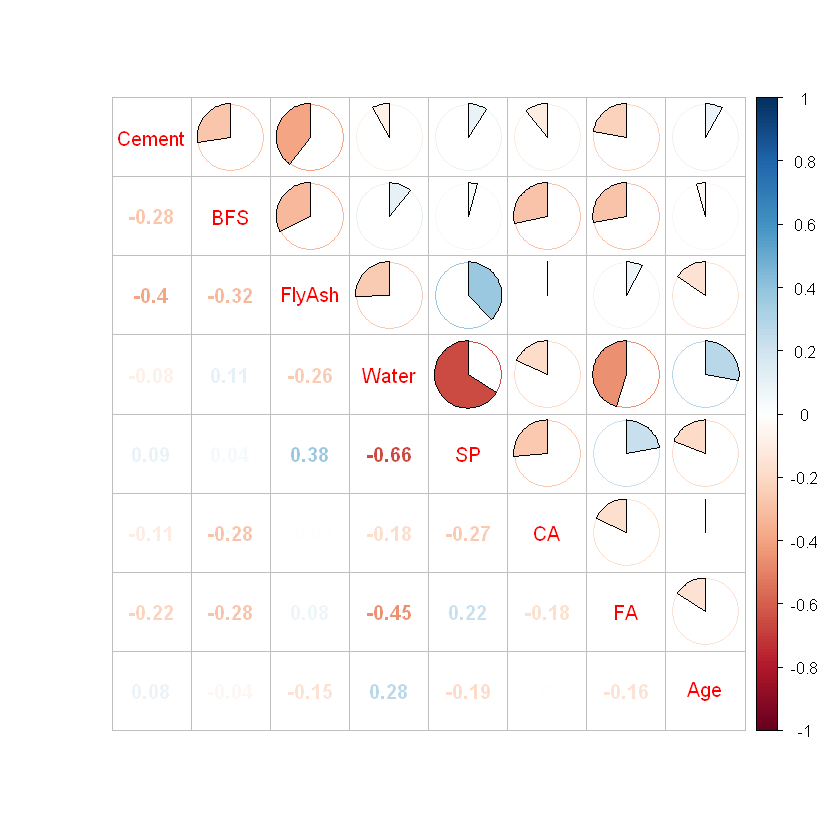

In [7]:
M <- cor(df_x[,c(1:8)])
corrplot.mixed(M, upper = "pie")

## Stepwise Regression 

In [17]:
FitAll <- lm(CCS ~ ., data = df) #CCS: 水泥抗壓強度
summary(FitAll)


Call:
lm(formula = CCS ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.654  -6.302   0.703   6.569  34.450 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -23.331214  26.585504  -0.878 0.380372    
Cement        0.119804   0.008489  14.113  < 2e-16 ***
BFS           0.103866   0.010136  10.247  < 2e-16 ***
FlyAsh        0.087934   0.012583   6.988 5.02e-12 ***
Water        -0.149918   0.040177  -3.731 0.000201 ***
SP            0.292225   0.093424   3.128 0.001810 ** 
CA            0.018086   0.009392   1.926 0.054425 .  
FA            0.020190   0.010702   1.887 0.059491 .  
Age           0.114222   0.005427  21.046  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.4 on 1021 degrees of freedom
Multiple R-squared:  0.6155,	Adjusted R-squared:  0.6125 
F-statistic: 204.3 on 8 and 1021 DF,  p-value: < 2.2e-16


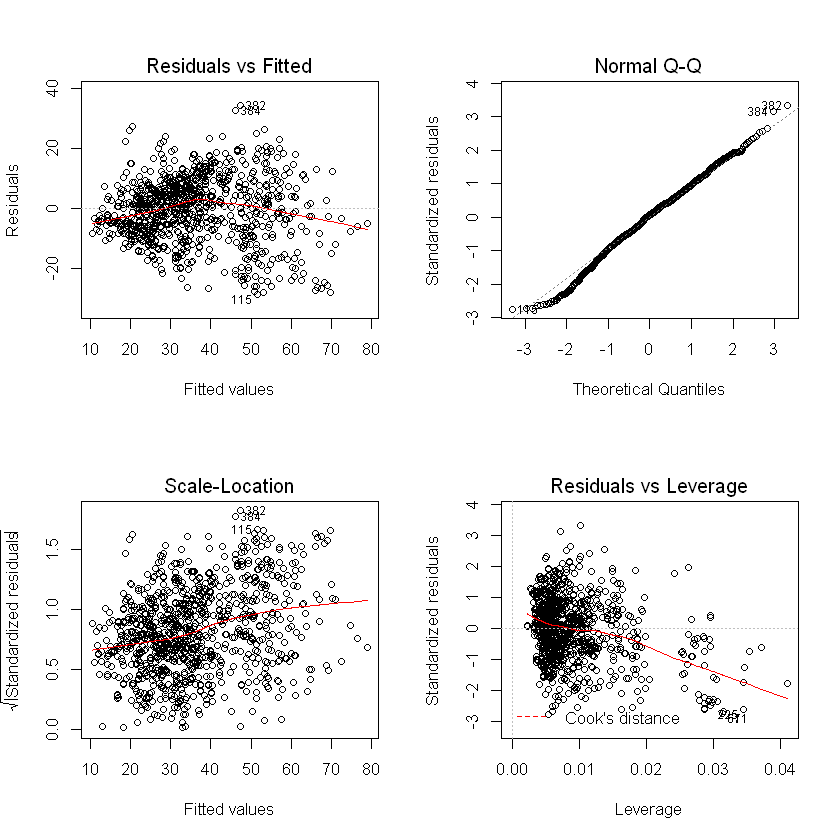

In [14]:
par(mfrow=c(2,2))
plot(fit) #Diagnostics

### Backward Selection

In [19]:
formula(FitAll)

CCS ~ Cement + BFS + FlyAsh + Water + SP + CA + FA + Age

In [20]:
step(FitAll, direction = "backward") #沒有減少任何變量

Start:  AIC=4832.91
CCS ~ Cement + BFS + FlyAsh + Water + SP + CA + FA + Age

         Df Sum of Sq    RSS    AIC
<none>                110413 4832.9
- FA      1       385 110798 4834.5
- CA      1       401 110814 4834.6
- SP      1      1058 111471 4840.7
- Water   1      1506 111919 4844.9
- FlyAsh  1      5281 115694 4879.0
- BFS     1     11356 121769 4931.7
- Cement  1     21539 131952 5014.5
- Age     1     47902 158315 5202.1



Call:
lm(formula = CCS ~ Cement + BFS + FlyAsh + Water + SP + CA + 
    FA + Age, data = df)

Coefficients:
(Intercept)       Cement          BFS       FlyAsh        Water           SP  
  -23.33121      0.11980      0.10387      0.08793     -0.14992      0.29222  
         CA           FA          Age  
    0.01809      0.02019      0.11422  


### Forward Selection

In [21]:
FitStart <- lm(CCS ~ 1, data = df)
step(FitStart, direction = "forward", scope = formula(FitAll)) #挑出6個變量

Start:  AIC=5801.45
CCS ~ 1

         Df Sum of Sq    RSS    AIC
+ Cement  1     71173 216003 5510.1
+ SP      1     38485 248690 5655.2
+ Age     1     31060 256115 5685.5
+ Water   1     24090 263085 5713.2
+ FA      1      8032 279143 5774.2
+ CA      1      7812 279363 5775.0
+ BFS     1      5221 281955 5784.6
+ FlyAsh  1      3212 283963 5791.9
<none>                287175 5801.4

Step:  AIC=5510.1
CCS ~ Cement

         Df Sum of Sq    RSS    AIC
+ SP      1   29675.8 186327 5359.9
+ Age     1   23993.4 192009 5390.8
+ BFS     1   22960.6 193042 5396.3
+ Water   1   17926.9 198076 5422.9
+ CA      1    3548.7 212454 5495.0
+ FlyAsh  1    2894.0 213109 5498.2
+ FA      1     960.0 215043 5507.5
<none>                216003 5510.1

Step:  AIC=5359.88
CCS ~ Cement + SP

         Df Sum of Sq    RSS    AIC
+ Age     1     37499 148827 5130.4
+ BFS     1     19467 166860 5248.2
+ FA      1      5867 180459 5328.9
+ Water   1       777 185550 5357.6
+ FlyAsh  1       743 185583 5357.8


Call:
lm(formula = CCS ~ Cement + SP + Age + BFS + Water + FlyAsh, 
    data = df)

Coefficients:
(Intercept)       Cement           SP          Age          BFS        Water  
   28.99298      0.10541      0.24031      0.11349      0.08647     -0.21809  
     FlyAsh  
    0.06866  


### Result
CCS ~ Cement + SP + Age + BFS + Water + FlyAsh

In [23]:
fit <- lm(CCS ~ Cement + SP + Age + BFS + Water + FlyAsh, data = df)
summary(fit)


Call:
lm(formula = CCS ~ Cement + SP + Age + BFS + Water + FlyAsh, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.987  -6.469   0.653   6.547  34.732 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.992982   4.213202   6.881 1.03e-11 ***
Cement       0.105413   0.004246  24.825  < 2e-16 ***
SP           0.240311   0.084567   2.842  0.00458 ** 
Age          0.113492   0.005407  20.988  < 2e-16 ***
BFS          0.086472   0.004974  17.385  < 2e-16 ***
Water       -0.218088   0.021129 -10.322  < 2e-16 ***
FlyAsh       0.068660   0.007735   8.877  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.41 on 1023 degrees of freedom
Multiple R-squared:  0.614,	Adjusted R-squared:  0.6118 
F-statistic: 271.2 on 6 and 1023 DF,  p-value: < 2.2e-16


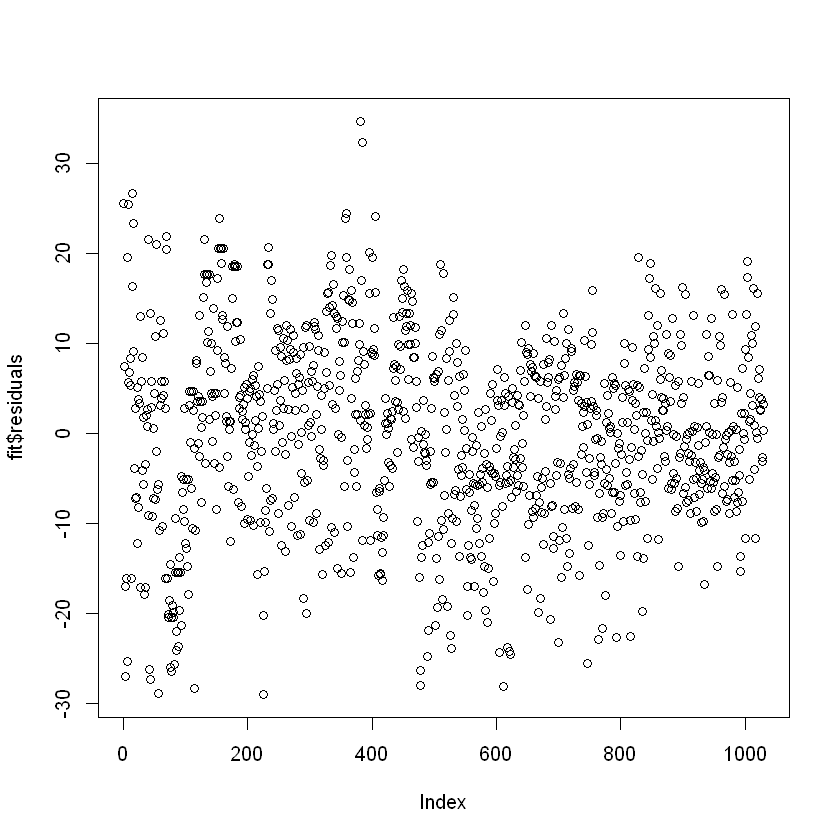

In [26]:
plot(fit$residuals) #看不出有甚麼需要特別處理的